✅ Accuracy: 76.92%

Confusion Matrix:
 [[70 15]
 [18 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        85
           1       0.73      0.69      0.71        58

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



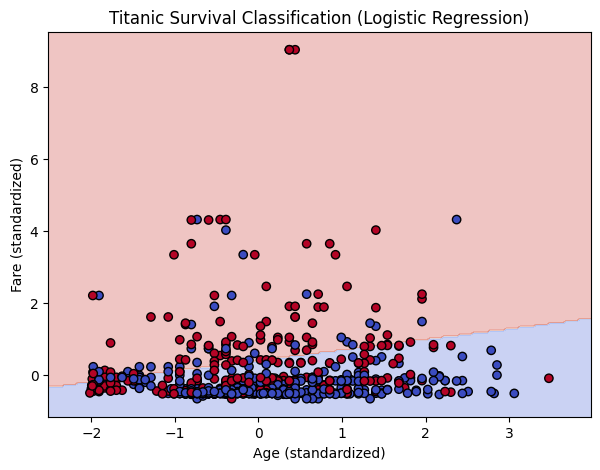

In [1]:
# Titanic Linear Classification – Targeting ~80% Accuracy
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows with too many missing values
titanic = titanic.dropna(subset=['age', 'embarked', 'sex', 'fare', 'pclass', 'alone'])

# Features & target
X = titanic[['pclass', 'sex', 'age', 'fare', 'embarked', 'alone']]
y = titanic['survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing: encode categorical + scale numerical
numeric_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'alone']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2%}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Visualization (using Age vs Fare only for 2D plot) ---
X_2D = titanic[['age', 'fare']]
y_2D = titanic['survived']
X_2D = X_2D.dropna()
y_2D = y_2D.loc[X_2D.index]

scaler_2D = StandardScaler()
X_scaled_2D = scaler_2D.fit_transform(X_2D)

model_2D = LogisticRegression()
model_2D.fit(X_scaled_2D, y_2D)

x_min, x_max = X_scaled_2D[:, 0].min() - 0.5, X_scaled_2D[:, 0].max() + 0.5
y_min, y_max = X_scaled_2D[:, 1].min() - 0.5, X_scaled_2D[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled_2D[:, 0], X_scaled_2D[:, 1], c=y_2D, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Titanic Survival Classification (Logistic Regression)')
plt.xlabel('Age (standardized)')
plt.ylabel('Fare (standardized)')
plt.show()
